In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,\
    confusion_matrix, ConfusionMatrixDisplay

In [36]:
train_part1 = pd.read_parquet("ClearData/train_part1.parquet")

In [37]:
train_part1["weights"] = 1
train_part1["weights"] = train_part1["target"].apply(lambda x: 10 if x == 1 else 1)

In [4]:
train_part1

,event_type_nm,event_desc,channel_indicator_type,channel_indicator_sub_type,operaton_amt,currency_iso_cd,mcc_code,pos_cd,developer_tools,phone_voip_call_state,web_rdp_connection,compromised,Hour,target,weights
0,14,75,6,5,56422.0,0.0,4,3.0,-1,-1,-1,-1,5,0,1
1,7,56,4,15,-1.0,-1.0,-1,-1.0,-1,-1,-1,-1,10,0,1
2,3,120,6,5,300870.0,0.0,10,3.0,-1,-1,-1,-1,10,0,1
3,14,75,6,5,298458.0,0.0,1,3.0,-1,-1,-1,-1,7,0,1
4,14,75,6,5,59944.0,0.0,15,3.0,-1,-1,-1,-1,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28618589,14,75,0,5,8067.0,0.0,4,-1.0,-1,-1,-1,-1,4,0,1
28618590,14,75,0,5,9005.0,0.0,4,-1.0,-1,-1,-1,-1,8,0,1
28618591,14,75,0,5,7992.0,0.0,4,-1.0,-1,-1,-1,-1,8,0,1
28618592,14,75,0,5,40849.0,0.0,4,-1.0,-1,-1,-1,-1,12,0,1


In [38]:
x = train_part1.drop(columns="target")
y = train_part1["target"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)    # Можно сделать проще!

train_weights = X_train["weights"]
test_weights = X_test["weights"]
X_train.drop(columns="weights", inplace=True)
X_test.drop(columns="weights", inplace=True)

In [20]:
def train_models(model, X_train, X_test, y_train, y_test, sample_weight=None):      # This function training model and output accuracy metrics
    if (sample_weight is None):
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train, sample_weight=sample_weight)
        
    predict_train = model.predict(X_train)
    print(f"Train metrics:")
    print(f"Accuracy: {accuracy_score(y_true=y_train, y_pred=predict_train)}")
    print(f"Precision: {precision_score(y_true=y_train, y_pred=predict_train)}")
    print(f"Recall: {recall_score(y_true=y_train, y_pred=predict_train)}")
    print(f"F1-score: {f1_score(y_true=y_train, y_pred=predict_train)}\n")

    predict_test = model.predict(X_test)
    print(f"Test metrics:")
    print(f"Accuracy: {accuracy_score(y_true=y_test, y_pred=predict_test)}")
    print(f"Precision: {precision_score(y_true=y_test, y_pred=predict_test)}")
    print(f"Recall: {recall_score(y_true=y_test, y_pred=predict_test)}")
    print(f"F1-score: {f1_score(y_true=y_test, y_pred=predict_test)}\n")

    print("Confusion matrix")
    cm = confusion_matrix(y_true=y_test, y_pred=predict_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)    
    disp.plot()

In [8]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=5, class_weight="balanced")

Train metrics:
Accuracy: 0.8546579313976687
Precision: 0.001966275397723887
Recall: 0.47034385785504285
F1-score: 0.003916179184222465

Test metrics:
Accuracy: 0.8543412326249362
Precision: 0.0019173775842002327
Recall: 0.45972382048331417
F1-score: 0.003916179184222465

Confusion matrix


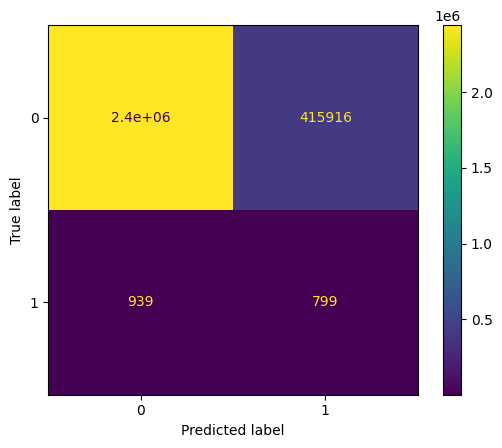

In [9]:
train_models(rfc, X_train, X_test, y_train, y_test)

In [10]:
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=5, class_weight="balanced")

Train metrics:
Accuracy: 0.8553918753829581
Precision: 0.001959940197385153
Recall: 0.4664450977885722
F1-score: 0.0039034784978400627

Test metrics:
Accuracy: 0.8551466528761016
Precision: 0.0019304460295551287
Recall: 0.46029919447640966
F1-score: 0.0039034784978400627

Confusion matrix


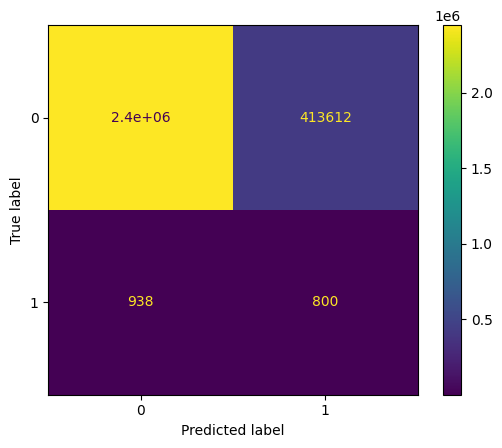

In [11]:
train_models(rfc2, X_train, X_test, y_train, y_test)

In [12]:
Gb = GradientBoostingClassifier(n_estimators=5, max_depth=5)

Train metrics:
Accuracy: 0.9993869952611227
Precision: 0.09142857142857143
Recall: 0.00102262559120542
F1-score: 0.002022628152455597

Test metrics:
Accuracy: 0.999387111878289
Precision: 0.0
Recall: 0.0
F1-score: 0.002022628152455597

Confusion matrix


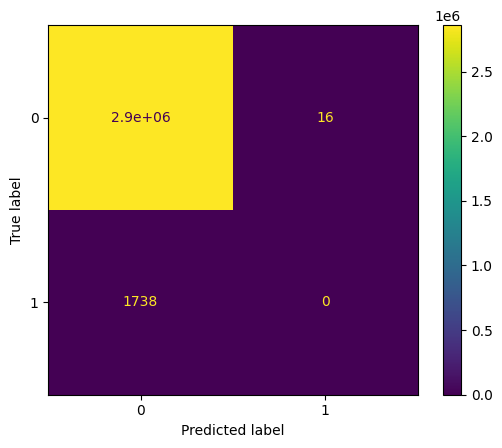

In [13]:
train_models(Gb, X_train, X_test, y_train, y_test)

In [14]:
Gb2 = GradientBoostingClassifier(n_estimators=5, max_depth=5)

Train metrics:
Accuracy: 0.9993043372657419
Precision: 0.06037151702786378
Recall: 0.009970599514252844
F1-score: 0.017114646187602854

Test metrics:
Accuracy: 0.999300105525777
Precision: 0.04778156996587031
Recall: 0.00805523590333717
F1-score: 0.013786312161496799

Confusion matrix


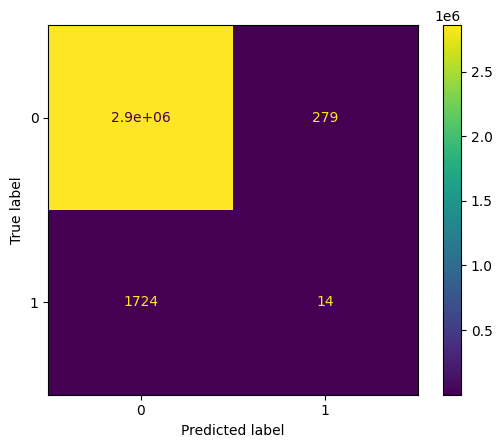

In [21]:
train_models(Gb2, X_train, X_test, y_train, y_test, sample_weight=train_weights)

In [22]:
Gb2_long = GradientBoostingClassifier(n_estimators=15, max_depth=5)

Train metrics:
Accuracy: 0.9993607885223336
Precision: 0.10214007782101167
Recall: 0.0067109804422855685
F1-score: 0.012594458438287154

Test metrics:
Accuracy: 0.999358109760785
Precision: 0.05405405405405406
Recall: 0.0034522439585730723
F1-score: 0.006489994591671174

Confusion matrix


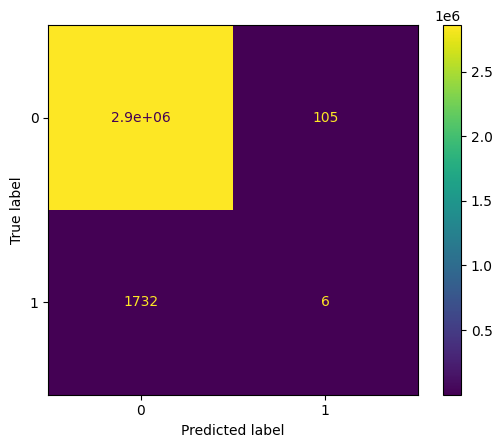

In [23]:
train_models(Gb2_long, X_train, X_test, y_train, y_test, sample_weight=train_weights)

In [24]:
Gb3 = GradientBoostingClassifier(n_estimators=5, max_depth=7)

Train metrics:
Accuracy: 0.9992433046829617
Precision: 0.06808988764044943
Recall: 0.01936597213345264
F1-score: 0.030155254777070064

Test metrics:
Accuracy: 0.9992431495600763
Precision: 0.06147540983606557
Recall: 0.01726121979286536
F1-score: 0.026954177897574125

Confusion matrix


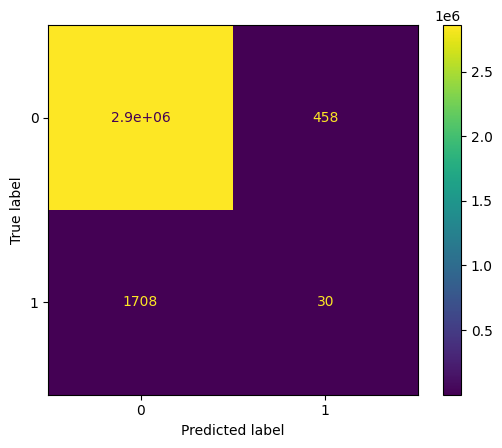

In [25]:
train_models(Gb3, X_train, X_test, y_train, y_test, sample_weight=train_weights)

Увеличим веса и повторим обучение

In [40]:
train_weights.value_counts()

weights
1     25741088
10       15646
Name: count, dtype: int64

In [ ]:
# train_weights = train_weights.apply(lambda x: 50 if x == 10 else 1)

In [42]:
train_weights.value_counts()

weights
1     25741088
50       15646
Name: count, dtype: int64

In [ ]:
# train_models(Gb3, X_train, X_test, y_train, y_test, sample_weight=train_weights)    # С тем же Gb3

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Gb4 = GradientBoostingClassifier()

grid_space={'max_depth':[3,5,10,15],
              'n_estimators':[10,20,50],
               'sample_weight':[train_weights]
           }

grid_search = GridSearchCV(
    estimator=Gb4,
    param_grid=grid_space,
    n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)
print("Лучшая модель:", grid_search.best_estimator_)